Exploring data from https://en.tutiempo.net/climate/ws-744860.html and https://en.tutiempo.net/climate/ws-722950.html , which includes average yearly temperatures over multiple years for LA and NYC. CO2 data from https://datahub.io/core/co2-ppm

In [376]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [377]:
la = pd.read_csv("LosAngelesInternationalAirport.csv", delimiter=",", dtype={'T': float, 'Year': int}, na_values=['-'])

ny = pd.read_csv("KennedyInternationalAirport.csv", delimiter=",",dtype={'T': float, 'Year': int}, na_values=['-'])

co2 = pd.read_csv("co2-annmean-mlo.csv", delimiter="," ,dtype={'Mean': float})

In [378]:
co2["Year"] = pd.to_datetime(co2["Year"]).dt.year

In [379]:
df = la.merge(ny, on="Year", how="outer", suffixes=("_LA", "_NY"))


df = df.merge(co2, on="Year", how="left")

df.rename(columns = {'Mean':'Mean CO2'}, inplace = True)

df.head()

,Year,T_LA,TM_LA,Tm_LA,PP_LA,V_LA,RA_LA,SN_LA,TS_LA,FG_LA,...,PP_NY,V_NY,RA_NY,SN_NY,TS_NY,FG_NY,TN_NY,GR_NY,Mean CO2,Uncertainty
0,1973,16.2,21.1,12.6,NaN,12.0,76.0,0.0,3.0,90.0,...,NaN,22.0,149.0,16.0,16.0,113.0,0.0,0.0,329.68,0.12
1,1974,16.5,21.6,12.5,NaN,11.6,56.0,1.0,5.0,84.0,...,NaN,19.7,145.0,24.0,15.0,101.0,0.0,1.0,330.18,0.12
2,1975,15.9,21.3,12.0,NaN,11.2,57.0,1.0,9.0,88.0,...,NaN,20.1,157.0,29.0,29.0,124.0,0.0,1.0,331.11,0.12
3,1976,17.3,22.9,13.0,NaN,13.2,50.0,1.0,7.0,79.0,...,NaN,20.3,131.0,25.0,22.0,102.0,0.0,1.0,332.04,0.12
4,1977,16.9,22.2,12.9,529.15,11.7,50.0,0.0,6.0,83.0,...,NaN,18.8,148.0,29.0,30.0,136.0,0.0,2.0,333.83,0.12


In [380]:
#choose only features that we want to study


features = ["Year", "Mean CO2", "T_LA", "TM_LA", "Tm_LA", "T_NY", "TM_NY", "Tm_NY"]

df = df[features]

df.describe()

,Year,Mean CO2,T_LA,TM_LA,Tm_LA,T_NY,TM_NY,Tm_NY
count,50.00000,45.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1997.50000,363.491778,17.051064,22.085106,13.174468,12.455319,17.617021,8.238298
std,14.57738,22.696902,0.574029,0.663318,0.573118,0.664899,0.791344,0.696124
min,1973.00000,329.680000,15.900000,20.700000,12.000000,11.100000,15.800000,6.900000
25%,1985.25000,344.650000,16.650000,21.600000,12.800000,12.050000,17.100000,7.750000
50%,1997.50000,360.820000,17.000000,22.200000,13.100000,12.400000,17.700000,8.200000
75%,2009.75000,381.900000,17.350000,22.500000,13.500000,13.050000,18.100000,8.700000
max,2022.00000,406.550000,18.500000,23.400000,14.700000,13.800000,19.200000,9.800000


# Exploratory data analysis 

Note: 
T	Average annual temperature
TM	Annual average maximum temperature
Tm	Average annual minimum temperature
PP	Rain or snow precipitation total annual
V	Annual average wind speed
RA	Number of days with rain
SN	Number of days with snow
TS	Number of days with storm
FG	Number of foggy days
TN	Number of days with tornado
GR	Number of days with hail

In [381]:
print(df.info())

df = df.set_index("Year")

df[:10]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      50 non-null     int32  
 1   Mean CO2  45 non-null     float64
 2   T_LA      47 non-null     float64
 3   TM_LA     47 non-null     float64
 4   Tm_LA     47 non-null     float64
 5   T_NY      47 non-null     float64
 6   TM_NY     47 non-null     float64
 7   Tm_NY     47 non-null     float64
dtypes: float64(7), int32(1)
memory usage: 3.3 KB
None


,Mean CO2,T_LA,TM_LA,Tm_LA,T_NY,TM_NY,Tm_NY
Year,,,,,,,
1973,329.68,16.2,21.1,12.6,12.5,17.4,8.6
1974,330.18,16.5,21.6,12.5,12.3,17.7,7.6
1975,331.11,15.9,21.3,12.0,12.5,17.0,8.7
1976,332.04,17.3,22.9,13.0,11.1,16.3,6.9
1977,333.83,16.9,22.2,12.9,11.2,16.3,7.2
1978,335.40,17.0,22.3,13.1,11.8,16.4,8.0
1979,336.84,16.8,22.3,12.6,11.9,16.7,8.1
1980,338.75,16.9,22.2,12.9,11.9,17.1,7.7
1981,340.11,17.5,22.8,13.7,12.3,17.5,8.3


Data from 1973

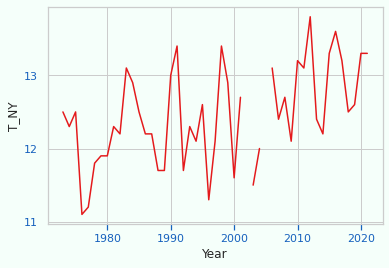

In [382]:
import matplotlib.ticker as ticker

ax =sns.lineplot(data=df, x="Year", y="T_NY")

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

Add 10 year moving averages to see long term trends

In [383]:
df['MA_LA'] = df['T_LA'].rolling(10, min_periods=5, center=True).mean()
df['MA_NY'] = df['T_NY'].rolling(10, min_periods=5, center=True).mean()
#ny['ma'] = ny['T'].rolling(10, min_periods=5, center=True).mean()
df['MATM_LA'] = df['TM_LA'].rolling(10, min_periods=5, center=True).mean()
df['MATM_NY'] = df['TM_NY'].rolling(10, min_periods=5, center=True).mean()

df['MATm_LA'] = df['Tm_LA'].rolling(10, min_periods=5, center=True).mean()
df['MATm_NY'] = df['Tm_NY'].rolling(10, min_periods=5, center=True).mean()

df['M_CO2'] = df['Mean CO2'].rolling(10, min_periods=5, center=True).mean()

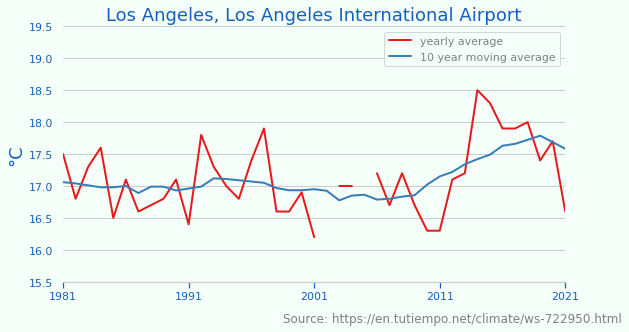

In [384]:
sns.set(style="whitegrid", rc={'axes.facecolor':'mintcream', 'figure.facecolor':'mintcream', 
                               'font.sans-serif': 'Helvetica', 'text.color': 'gray', 'xtick.bottom': True,
                               'xtick.color': '#1560bd', 'ytick.color': '#1560bd',   "axes.xmargin": .05}, palette="Set1", color_codes=True) 

fig=plt.figure(figsize=(9,4.7))
#fig.set_dpi(1200)
#, color='#1164b4')
ax = sns.lineplot(data=df, x='Year', y='T_LA',label='yearly average',linewidth = 2)
ax = sns.lineplot(data=df, x='Year', y='MA_LA',label='10 year moving average',linewidth = 2)

plt.ylabel('°C', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
plt.xlabel('')
plt.ylim(15.5,19.5)
plt.xlim(1981,2021)
plt.xticks(ticks=[1981, 1991, 2001, 2011, 2021])
ax.xaxis.grid(False) #'fontweight':'bold'
plt.title('Los Angeles, Los Angeles International Airport', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
sns.despine(left=True)
plt.legend()
plt.annotate('Source: https://en.tutiempo.net/climate/ws-722950.html', (0,0), (220,-30), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')

#plt.savefig("LongBeach.png", bbox_inches = 'tight')

plt.show()

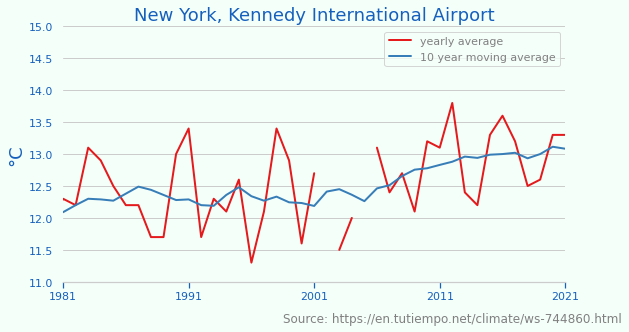

In [385]:
sns.set(style="whitegrid", rc={'axes.facecolor':'mintcream', 'figure.facecolor':'mintcream', 
                               'font.sans-serif': 'Helvetica', 'text.color': 'gray', 'xtick.bottom': True,
                               'xtick.color': '#1560bd', 'ytick.color': '#1560bd',   "axes.xmargin": .05}, palette="Set1", color_codes=True) 

fig=plt.figure(figsize=(9,4.7))
#fig.set_dpi(1200)
#, color='#1164b4')
ax = sns.lineplot(data=df, x='Year', y='T_NY',label='yearly average',linewidth = 2)
ax = sns.lineplot(data=df, x='Year', y='MA_NY',label='10 year moving average',linewidth = 2)

plt.ylabel('°C', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
plt.xlabel('')
plt.ylim(11,15)
plt.xlim(1981,2021)
plt.xticks(ticks=[1981, 1991, 2001, 2011, 2021])
ax.xaxis.grid(False) #'fontweight':'bold'
plt.title('New York, Kennedy International Airport', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
sns.despine(left=True)
plt.legend()
plt.annotate('Source: https://en.tutiempo.net/climate/ws-744860.html', (0,0), (220,-30), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')

#plt.savefig("NewYork.png", bbox_inches = 'tight')

plt.show()

# By how much did the 10 year moving average increase between 1981 and 2021 (last 30 years in the data)?

In [386]:
print("LA :", df.loc[2021]["MA_LA"] - df.loc[1981]["MA_LA"])

LA : 0.5233333333333299


In [387]:
print("NYC :", df.loc[2021]["MA_NY"] - df.loc[1981]["MA_NY"])

NYC : 0.9933333333333376


What is the average increase per year when we apply a linear regression?

In [388]:
from scipy import stats

slopela, interceptla, rla, pla, std_errla = stats.linregress(df["T_LA"].dropna().index, df["T_LA"].dropna())

slopeny, interceptny, rny, pny, std_errny = stats.linregress(df["T_NY"].dropna().index, df["T_NY"].dropna())

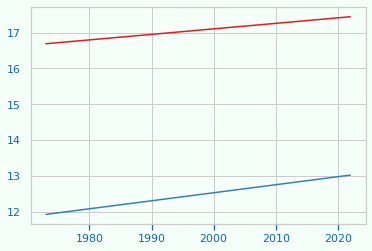

In [389]:
plt.plot(df.index, df.index * slopela + interceptla)
plt.plot(df.index, df.index * slopeny + interceptny)

plt.show()

In [390]:
print("LA average yearly increase :", round(slopela,4), "°C")
print("NY average yearly increase :", round(slopeny,4), "°C")

LA average yearly increase : 0.0154 °C
NY average yearly increase : 0.0224 °C


It is clear that over the last 30 years, the average daily temperature increased by about 0.015 °C in LA and 0.022 °C per year in NYC. 
If this trend would continue, we might ask the question how long would it take till the average temperature in NYC would be the same as the average temperature in LA in 1973 or the same as LA that year. Lets try to answer this questions:

In [391]:
def findIntersection(x1,y1,x2,y2,x3,y3,x4,y4):
        px= ( (x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4) ) / ( (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4) ) 
        py= ( (x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4) ) / ( (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4) )
        return [px, py]

In [309]:
findIntersection(df.index[0], slopela * df.index[0] + interceptla,
                df["T_LA"].index[40],slopela * df["T_LA"].index[40] + interceptla,
                  df.index[0], slopeny * df.index[0] + interceptny,
                 df["T_NY"].index[40], slopeny * df["T_NY"].index[40] + interceptny)

[2652.2599887450665, 27.130782217219906]

In [310]:
for i in range(1000):
    if slopeny * (1973+i) + interceptny >= df["MA_LA"].iloc[0]:
        print(1973+i)
        break

2181


So if the trends continued unchanged (which is unlikely ;) ), in 2181 the 10 year average temperature should be the same as the 10 year average temperature in LA was in 1973.
By 2652 both cities would have the same 10 year average temperature.

# What about correlation between Mean CO2 concentration and average daily Temperature?

In [393]:
newfeatures = ["Mean CO2", "T_NY", "T_LA", "MA_LA", "MA_NY", "M_CO2"]

In [394]:
df1 = df[newfeatures]

<AxesSubplot:>

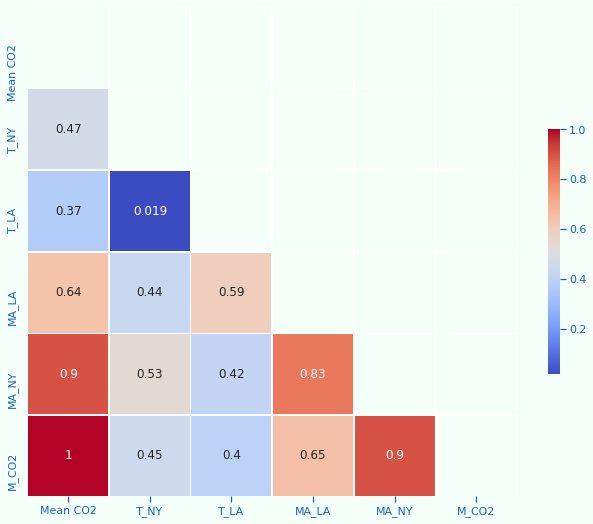

In [395]:
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

So there is a big correlation (0.9) between 10 year moving average temperature in NYC and CO2 concentration. In general the 10 year moving averages have higher correlations (0.9 and 0.64) with CO2 concentration than yearly average temperatures (0.47 and 0.37). Also this data suggests that NYC is more affected by increased CO2 concentrations than LA. Interestingly, the yearly average temperatures for both cities have the lowest correlation, only 0.019. However, when the 10 year moving average is taken, the correlation becomes 0.83.

Lets do a linear regression:

In [396]:
slope1, intercept1, r1, p1, std_err1 = stats.linregress(df[["Mean CO2","T_NY"]].dropna()["Mean CO2"],df[["Mean CO2","T_NY"]].dropna()["T_NY"])

slope2, intercept2, r2, p2, std_err2 = stats.linregress(df[["Mean CO2","T_LA"]].dropna()["Mean CO2"], df[["Mean CO2","T_LA"]].dropna()["T_LA"])

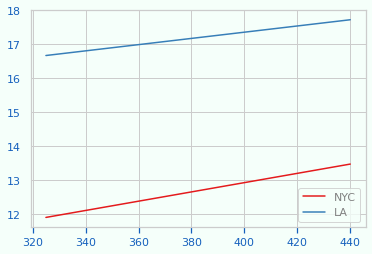

In [397]:
caxis = np.linspace(325, 440, 1000)

plt.plot(caxis, caxis * slope1 + intercept1, label="NYC")
plt.plot(caxis, caxis * slope2 + intercept2, label="LA")

plt.legend()
plt.show()

In [398]:
print("LA average temperature increase per 100 ppM:", round(100*slope2,4), "°C")
print("NY average temperature increase per 100 ppM:", round(100*slope1,4), "°C")

LA average temperature increase per 100 ppM: 0.9175 °C
NY average temperature increase per 100 ppM: 1.3684 °C


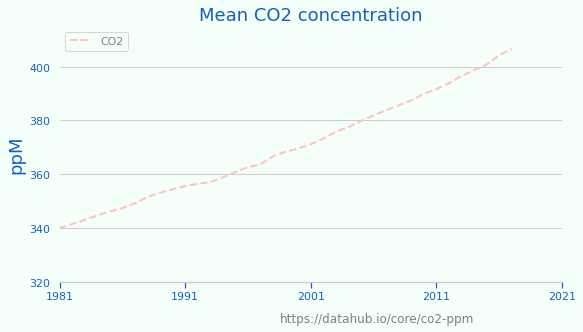

In [403]:
sns.set(style="whitegrid", rc={'axes.facecolor':'mintcream', 'figure.facecolor':'mintcream', 
                               'font.sans-serif': 'Helvetica', 'text.color': 'gray', 'xtick.bottom': True,
                               'xtick.color': '#1560bd', 'ytick.color': '#1560bd',   "axes.xmargin": .05}, palette="Set1", color_codes=True) 

fig=plt.figure(figsize=(9,4.7))
#fig.set_dpi(1200)
#, color='#1164b4')
#ax = sns.lineplot(data=df, x='Year', y='MA_NY',label='',linewidth = 0)
#plt.plot(df.index, df.index * slopeny + interceptny, color="gray", linewidth=1, linestyle="--", label="trend")

#ax2 = ax.twinx()
ax = sns.lineplot(data=df, x='Year', y='Mean CO2',label='CO2',linewidth = 2, color="pink", linestyle="--")


plt.ylabel('ppM', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
plt.xlabel('')
plt.ylim(320,415)
plt.xlim(1981,2021)
plt.xticks(ticks=[1981, 1991, 2001, 2011, 2021])
#ax.yaxis.grid(False) #'fontweight':'bold'
ax.xaxis.grid(False)
#ax2.yaxis.grid(False)
#ax.axis.grid(False) 
plt.title('Mean CO2 concentration', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
sns.despine(left=True)
plt.legend()
plt.annotate('https://datahub.io/core/co2-ppm', (0,0), (220,-30), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')

#plt.savefig("NewYork.png", bbox_inches = 'tight')

plt.show()

# What about average minimal daily temperature and average maximal daily temperature?

In [404]:
df['Tmax_LA'] = df['TM_LA'].rolling(10, min_periods=5, center=True).mean()
df['Tmax_NY'] = df['TM_NY'].rolling(10, min_periods=5, center=True).mean()
df['Tmin_LA'] = df['Tm_LA'].rolling(10, min_periods=5, center=True).mean()
df['Tmin_NY'] = df['Tm_NY'].rolling(10, min_periods=5, center=True).mean()

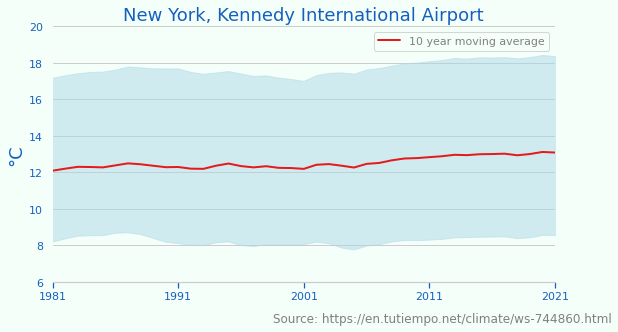

In [405]:
sns.set(style="whitegrid", rc={'axes.facecolor':'mintcream', 'figure.facecolor':'mintcream', 
                               'font.sans-serif': 'Helvetica', 'text.color': 'gray', 'xtick.bottom': True,
                               'xtick.color': '#1560bd', 'ytick.color': '#1560bd',   "axes.xmargin": .05}, palette="Set1", color_codes=True) 

fig=plt.figure(figsize=(9,4.7))
#fig.set_dpi(1200)
#, color='#1164b4')
#ax = sns.lineplot(data=ny, x='Year', y='Tmax',linewidth = 2)
ax = sns.lineplot(data=df, x='Year', y='MA_NY',label='10 year moving average',linewidth = 2)
#ax = sns.lineplot(data=ny, x='Year', y='Tmin',linewidth = 2)

#plt.fill_between(x, y3, y4, color='grey', alpha='0.5')
ax.fill_between(df.index, df["Tmin_NY"], df["Tmax_NY"], color="lightblue", alpha=0.5)

plt.ylabel('°C', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
plt.xlabel('')
plt.ylim(6,20)
plt.xlim(1981,2021)
plt.xticks(ticks=[1981, 1991, 2001, 2011, 2021])
ax.xaxis.grid(False) #'fontweight':'bold'
plt.title('New York, Kennedy International Airport', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
sns.despine(left=True)
plt.legend()
plt.annotate('Source: https://en.tutiempo.net/climate/ws-744860.html', (0,0), (220,-30), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')

#plt.savefig("NewYork.png", bbox_inches = 'tight')

plt.show()

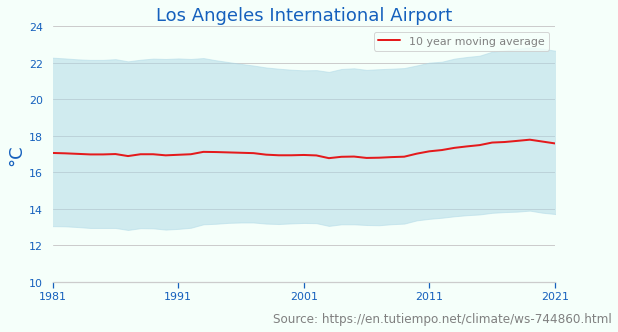

In [406]:
sns.set(style="whitegrid", rc={'axes.facecolor':'mintcream', 'figure.facecolor':'mintcream', 
                               'font.sans-serif': 'Helvetica', 'text.color': 'gray', 'xtick.bottom': True,
                               'xtick.color': '#1560bd', 'ytick.color': '#1560bd',   "axes.xmargin": .05}, palette="Set1", color_codes=True) 

fig=plt.figure(figsize=(9,4.7))
#fig.set_dpi(1200)
#, color='#1164b4')
#ax = sns.lineplot(data=la, x='Year', y='Tmax',linewidth = 2)
ax = sns.lineplot(data=df, x='Year', y='MA_LA',label='10 year moving average',linewidth = 2)
#ax = sns.lineplot(data=la, x='Year', y='Tmin',linewidth = 2)

ax.fill_between(df.index, df["Tmin_LA"], df["Tmax_LA"], color="lightblue", alpha=0.5)

plt.ylabel('°C', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
plt.xlabel('')
plt.ylim(10, 24)
plt.xlim(1981,2021)
plt.xticks(ticks=[1981, 1991, 2001, 2011, 2021])
ax.xaxis.grid(False) #'fontweight':'bold'
plt.title('Los Angeles International Airport', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
sns.despine(left=True)
plt.legend()
plt.annotate('Source: https://en.tutiempo.net/climate/ws-744860.html', (0,0), (220,-30), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')

#plt.savefig("NewYork.png", bbox_inches = 'tight')

plt.show()

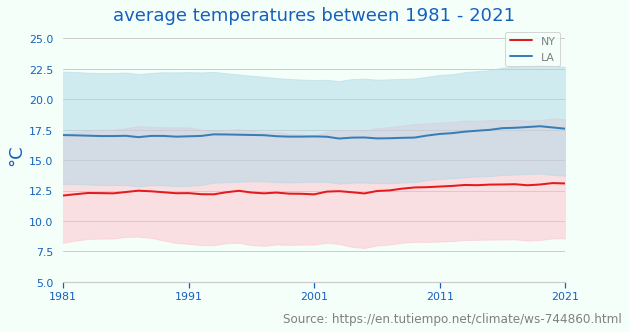

In [407]:
sns.set(style="whitegrid", rc={'axes.facecolor':'mintcream', 'figure.facecolor':'mintcream', 
                               'font.sans-serif': 'Helvetica', 'text.color': 'gray', 'xtick.bottom': True,
                               'xtick.color': '#1560bd', 'ytick.color': '#1560bd',   "axes.xmargin": .05}, palette="Set1", color_codes=True) 

fig=plt.figure(figsize=(9,4.7))
#fig.set_dpi(1200)
#, color='#1164b4')
ax = sns.lineplot(data=df, x='Year', y='MA_NY',label="NY", linewidth = 2)
ax = sns.lineplot(data=df, x='Year', y='MA_LA',label='LA',linewidth = 2)
#ax = sns.lineplot(data=la, x='Year', y='Tmin',linewidth = 2)

ax.fill_between(df.index, df["Tmin_NY"], df["Tmax_NY"], color="pink", alpha=0.5)
ax.fill_between(df.index, df["Tmin_LA"], df["Tmax_LA"], color="lightblue", alpha=0.5)

plt.ylabel('°C', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
plt.xlabel('')
plt.ylim(5, 26)
plt.xlim(1981,2021)
plt.xticks(ticks=[1981, 1991, 2001, 2011, 2021])
ax.xaxis.grid(False) #'fontweight':'bold'
plt.title('average temperatures between 1981 - 2021', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
sns.despine(left=True)
plt.legend()
plt.annotate('Source: https://en.tutiempo.net/climate/ws-744860.html', (0,0), (220,-30), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')

#plt.savefig("NewYork.png", bbox_inches = 'tight')

plt.show()

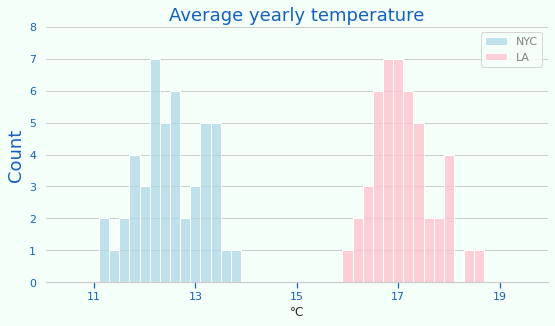

In [408]:
sns.set(style="whitegrid", rc={'axes.facecolor':'mintcream', 'figure.facecolor':'mintcream', 
                               'font.sans-serif': 'Helvetica', 'text.color': 'gray', 'xtick.bottom': True,
                               'xtick.color': '#1560bd', 'ytick.color': '#1560bd',   "axes.xmargin": .05}, palette="Set1", color_codes=True) 

fig=plt.figure(figsize=(9,4.7))


ax = sns.histplot(data=df, x="T_NY", color="lightblue", alpha=0.75, binwidth=0.2, binrange=(10.5, 19.5), label="NYC")
ax = sns.histplot(data=df, x="T_LA", color="pink", alpha=0.75, binwidth=0.2, binrange=(10.5, 19.5), label="LA")

plt.ylabel('Count', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
plt.xlabel('°C')

plt.title("Average yearly temperature", fontdict = { 'fontsize': 18, 'color': '#1560bd'})

sns.despine(left=True)

plt.xticks(ticks=[11, 13, 15, 17, 19])
plt.ylim(0,8)
ax.xaxis.grid(False)
plt.legend()
plt.show()

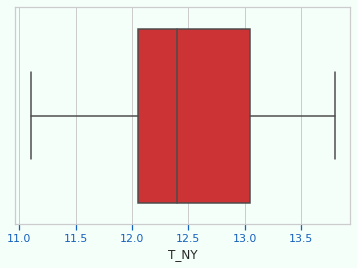

In [409]:
ax = sns.boxplot(x=df["T_NY"])

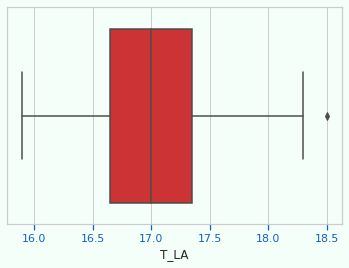

In [410]:
ax = sns.boxplot(x=df["T_LA"])

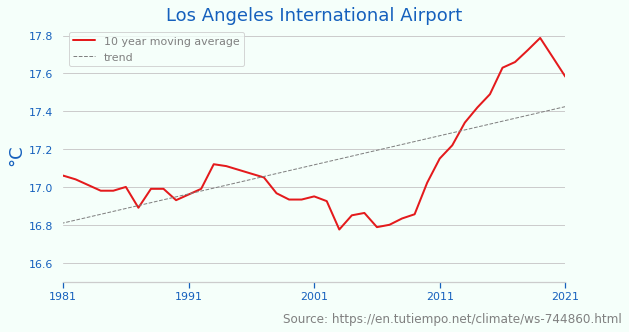

In [411]:
#plt.plot(df.index, df.index * slopeny + interceptny)

sns.set(style="whitegrid", rc={'axes.facecolor':'mintcream', 'figure.facecolor':'mintcream', 
                               'font.sans-serif': 'Helvetica', 'text.color': 'gray', 'xtick.bottom': True,
                               'xtick.color': '#1560bd', 'ytick.color': '#1560bd',   "axes.xmargin": .05}, palette="Set1", color_codes=True) 

fig=plt.figure(figsize=(9,4.7))
#fig.set_dpi(1200)
#, color='#1164b4')
#ax = sns.lineplot(data=la, x='Year', y='Tmax',linewidth = 2)
ax = sns.lineplot(data=df, x='Year', y='MA_LA',label='10 year moving average',linewidth = 2)
#ax = sns.lineplot(data=la, x='Year', y='Tmin',linewidth = 2)
plt.plot(df.index, df.index * slopela + interceptla, color="gray", linewidth=1, linestyle="--", label="trend")
#ax.fill_between(df.index, df["Tmin_LA"], df["Tmax_LA"], color="lightblue", alpha=0.5)

plt.ylabel('°C', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
plt.xlabel('')
#plt.ylim(15, 19)
plt.xlim(1981,2021)
plt.xticks(ticks=[1981, 1991, 2001, 2011, 2021])
ax.xaxis.grid(False) #'fontweight':'bold'
plt.title('Los Angeles International Airport', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
sns.despine(left=True)
plt.legend()
plt.annotate('Source: https://en.tutiempo.net/climate/ws-744860.html', (0,0), (220,-30), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')

#plt.savefig("NewYork.png", bbox_inches = 'tight')

plt.show()

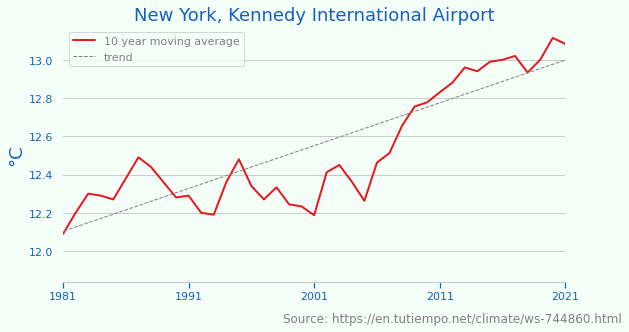

In [412]:
sns.set(style="whitegrid", rc={'axes.facecolor':'mintcream', 'figure.facecolor':'mintcream', 
                               'font.sans-serif': 'Helvetica', 'text.color': 'gray', 'xtick.bottom': True,
                               'xtick.color': '#1560bd', 'ytick.color': '#1560bd',   "axes.xmargin": .05}, palette="Set1", color_codes=True) 

fig=plt.figure(figsize=(9,4.7))
#fig.set_dpi(1200)
#, color='#1164b4')
#ax = sns.lineplot(data=la, x='Year', y='Tmax',linewidth = 2)
ax = sns.lineplot(data=df, x='Year', y='MA_NY',label='10 year moving average',linewidth = 2)
#ax = sns.lineplot(data=la, x='Year', y='Tmin',linewidth = 2)
plt.plot(df.index, df.index * slopeny + interceptny, color="gray", linewidth=1, linestyle="--", label="trend")
#ax.fill_between(df.index, df["Tmin_LA"], df["Tmax_LA"], color="lightblue", alpha=0.5)

plt.ylabel('°C', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
plt.xlabel('')
#plt.ylim(15, 19)
plt.xlim(1981,2021)
plt.xticks(ticks=[1981, 1991, 2001, 2011, 2021])
ax.xaxis.grid(False) #'fontweight':'bold'
plt.title('New York, Kennedy International Airport', fontdict = { 'fontsize': 18, 'color': '#1560bd'})
sns.despine(left=True)
plt.legend()
plt.annotate('Source: https://en.tutiempo.net/climate/ws-744860.html', (0,0), (220,-30), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')

#plt.savefig("NewYork.png", bbox_inches = 'tight')

plt.show()